In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
app_tr = pd.read_csv('application_train.csv')
app_ts = pd.read_csv('application_test.csv')

In [3]:
def indic(x):
    if x:
        return 1
    else:
        return 0

In [4]:
app_tr['CREDIT_INCOME_RATIO'] = app_tr['AMT_CREDIT']/app_tr['AMT_INCOME_TOTAL']
app_ts['CREDIT_INCOME_RATIO'] = app_tr['AMT_CREDIT']/app_ts['AMT_INCOME_TOTAL']

In [5]:
y = app_tr['TARGET'].values
app = pd.concat([app_tr.drop('TARGET', axis=1),app_ts], axis=0)

In [6]:
app.head(10)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_INCOME_RATIO
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2.007889
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.790750
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2.316167
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.222222
5,100008,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,4.954500
6,100009,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,...,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0,9.127053
7,100010,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.250000
8,100011,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,913500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,9.063200
9,100012,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,3.000000


In [7]:
app[app['DAYS_EMPLOYED']==365243]['DAYS_EMPLOYED'].value_counts()

365243    64648
Name: DAYS_EMPLOYED, dtype: int64

This the probabaly the default that was set for null values

In [8]:
app['NAME_INCOME_TYPE'].value_counts()

Working                 183307
Commercial associate     83019
Pensioner                64635
State servant            25235
Unemployed                  23
Student                     20
Businessman                 11
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [9]:
app[app['NAME_INCOME_TYPE']=='Unemployed']['DAYS_EMPLOYED'].replace(365243, 0, inplace=True)

c:\python\python36\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [10]:
app.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_INCOME_RATIO
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2.007889
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.790750
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2.316167
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.222222


In [11]:
app['DAYS_EMPLOYED_ISNULL'] = app['DAYS_EMPLOYED'].isnull()
app['DAYS_EMPLOYED_ISNULL'] = app['DAYS_EMPLOYED_ISNULL'].apply(lambda x:indic(x))

In [12]:
(app['AMT_INCOME_TOTAL']<=0).sum()

0

In [13]:
app['ANNUITY_INCOME_RATIO'] = app['AMT_ANNUITY']/app['AMT_INCOME_TOTAL']

In [14]:
app['CREDIT_GOODS_PRICE_DIFF'] = app['AMT_CREDIT'] - app['AMT_GOODS_PRICE']

In [15]:
app['ENTIRE_INCOME'] = -app['AMT_INCOME_TOTAL']*app['DAYS_EMPLOYED']

In [16]:
(app['ENTIRE_INCOME']==0).sum()

2

In [17]:
app['CREDIT_ENTIRE_INCOME_RATIO'] = app['AMT_CREDIT']/(1+app['ENTIRE_INCOME'])

In [18]:
app['ANNUITY_ENTIRE_INCOME_RATIO'] = app['AMT_ANNUITY']/(1+app['ENTIRE_INCOME'])

c:\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


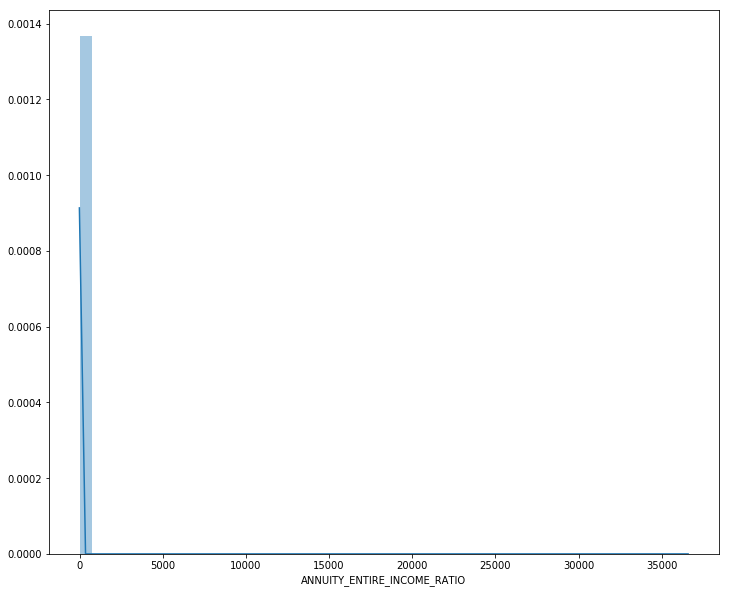

In [19]:
plt.figure(figsize=(12,10))
sns.distplot(app['ANNUITY_ENTIRE_INCOME_RATIO'].dropna())
plt.show()

In [20]:
app['CNT_CHILDREN'].value_counts()

0     250056
1      70623
2      30698
3       4252
4        478
5         96
6         24
7          8
8          5
14         3
11         3
19         2
12         2
10         2
9          2
20         1
Name: CNT_CHILDREN, dtype: int64

In [21]:
app['INCOME_PER_CHILD'] = app['AMT_INCOME_TOTAL']/(0.1+app['CNT_CHILDREN'])

In [22]:
app['CNT_FAM_MEMBERS'].value_counts()

2.0     184411
1.0      78098
3.0      60774
4.0      28387
5.0       3990
6.0        451
7.0         93
8.0         22
9.0          7
10.0         6
13.0         3
14.0         2
20.0         2
16.0         2
12.0         2
15.0         1
21.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [23]:
app['INCOME_PER_FAM_MEMBER'] = app['AMT_INCOME_TOTAL']/app['CNT_FAM_MEMBERS']

In [24]:
app['ENTIRE_INCOME_PER_FAM_MEMBER'] = app['ENTIRE_INCOME']/app['CNT_FAM_MEMBERS']

In [25]:
app['ENTIRE_INCOME_PER_CHILD'] = app['ENTIRE_INCOME']/(0.1 + app['CNT_CHILDREN'])

In [26]:
app[app['CNT_FAM_MEMBERS'].isnull()].head(20)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,DAYS_EMPLOYED_ISNULL,ANNUITY_INCOME_RATIO,CREDIT_GOODS_PRICE_DIFF,ENTIRE_INCOME,CREDIT_ENTIRE_INCOME_RATIO,ANNUITY_ENTIRE_INCOME_RATIO,INCOME_PER_CHILD,INCOME_PER_FAM_MEMBER,ENTIRE_INCOME_PER_FAM_MEMBER,ENTIRE_INCOME_PER_CHILD
41982,148605,Revolving loans,M,N,Y,0,450000.0,675000.0,33750.0,NaN,...,0,0.075000,NaN,522450000.0,0.001292,0.000065,4500000.0,NaN,NaN,5.224500e+09
187348,317181,Revolving loans,F,N,Y,0,202500.0,585000.0,29250.0,NaN,...,0,0.144444,NaN,46980000.0,0.012452,0.000623,2025000.0,NaN,NaN,4.698000e+08


In [27]:
app['CNT_FAM_MEMBERS'].fillna(2, inplace=True)

In [28]:
app['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      288253
Family              46030
Spouse, partner     12818
Children             3675
Other_B              1981
Other_A               975
Group of people       320
Name: NAME_TYPE_SUITE, dtype: int64

In [29]:
app['NAME_TYPE_SUITE'].isnull().sum()

2203

In [30]:
app['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace=True)

In [31]:
app['OWN_CAR_AGE'].fillna(0, inplace=True)

In [32]:
app.head(10)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,DAYS_EMPLOYED_ISNULL,ANNUITY_INCOME_RATIO,CREDIT_GOODS_PRICE_DIFF,ENTIRE_INCOME,CREDIT_ENTIRE_INCOME_RATIO,ANNUITY_ENTIRE_INCOME_RATIO,INCOME_PER_CHILD,INCOME_PER_FAM_MEMBER,ENTIRE_INCOME_PER_FAM_MEMBER,ENTIRE_INCOME_PER_CHILD
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0.121978,55597.5,1.289925e+08,0.003152,1.914879e-04,2.025000e+06,202500.0,1.289925e+08,1.289925e+09
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0.132217,164002.5,3.207600e+08,0.004033,1.112935e-04,2.700000e+06,135000.0,1.603800e+08,3.207600e+09
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0.100000,0.0,1.518750e+07,0.008889,4.444444e-04,6.750000e+05,67500.0,1.518750e+07,1.518750e+08
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0.219900,15682.5,4.102650e+08,0.000762,7.235933e-05,1.350000e+06,67500.0,2.051325e+08,4.102650e+09
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0.179963,0.0,3.691170e+08,0.001390,5.923731e-05,1.215000e+06,121500.0,3.691170e+08,3.691170e+09
5,100008,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,...,0,0.277955,35995.5,1.572120e+08,0.003120,1.750343e-04,9.900000e+05,49500.0,7.860600e+07,1.572120e+09
6,100009,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,...,0,0.241526,165726.0,5.352300e+08,0.002916,7.716496e-05,1.554545e+05,57000.0,1.784100e+08,4.865727e+08
7,100010,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,...,0,0.116875,0.0,1.616400e+08,0.009465,2.603007e-04,3.600000e+06,180000.0,8.082000e+07,1.616400e+09
8,100011,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,913500.0,...,0,0.300680,106110.0,-4.108984e+10,-0.000025,-8.232328e-07,1.125000e+06,56250.0,-2.054492e+10,-4.108984e+11
9,100012,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,...,0,0.150000,0.0,2.725650e+08,0.001486,7.429420e-05,1.350000e+06,135000.0,2.725650e+08,2.725650e+09


c:\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


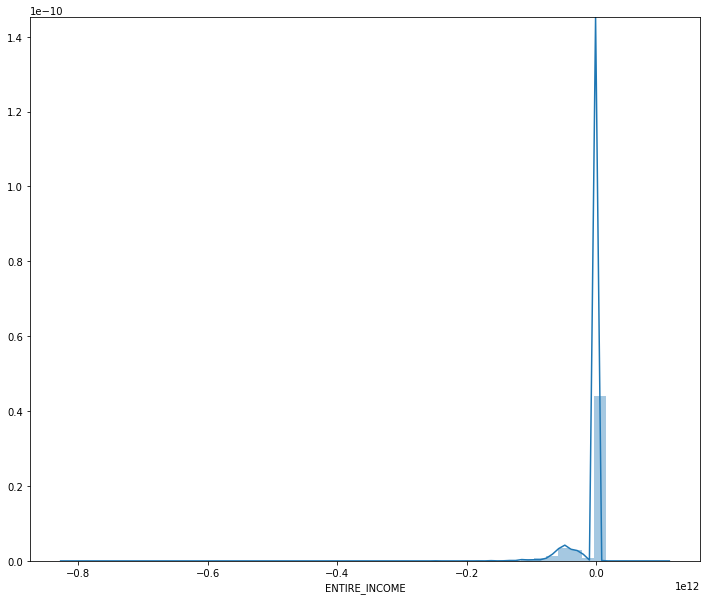

In [33]:
plt.figure(figsize=(12,10))
sns.distplot(app['ENTIRE_INCOME'].dropna())
plt.show()

In [34]:
app['CREDIT_ENTIRE_INCOME_RATIO'].min()

-0.00023200127617588302

In [35]:
app['AMT_ANNUITY'].isnull().sum()

36

annuity has 36 null values, annuity must be a function of credit amount, annual income, the person's fortune and the his/her behaviour.

It might actually make sense to cluster people based on behaviour and create different models to predict annuity

AMT_ANNUITY_ISNULL may be an useful feature, we ca remove it if it is'nt

In [36]:
app['AMT_ANNUITY_ISNULL'] = app['AMT_ANNUITY'].isnull().apply(lambda x:int(x))

AMT_INCOME_TOTAL - his income decides how much he can pay<br>
AMT_CREDIT - credit amount decides how much he should pay<br>
DAYS_EMPLOYED - decides how fortunate he is at the very moment, but it has null values.<br>
DAYS_LAST_PHONE_CHANGE - says about his spending habits<br>
CREDIT_INCOME_RATIO says how burdening is this credit to him<br>
These features decide a person's annuity.

In [37]:
app.isnull().sum()

SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         36
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                      0
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                          0
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE               

Days employed can be imputed from taking median or mean of DAYS_EMPLOYED binning from DAYS_BIRTH, now we have to decide how may bins.

c:\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


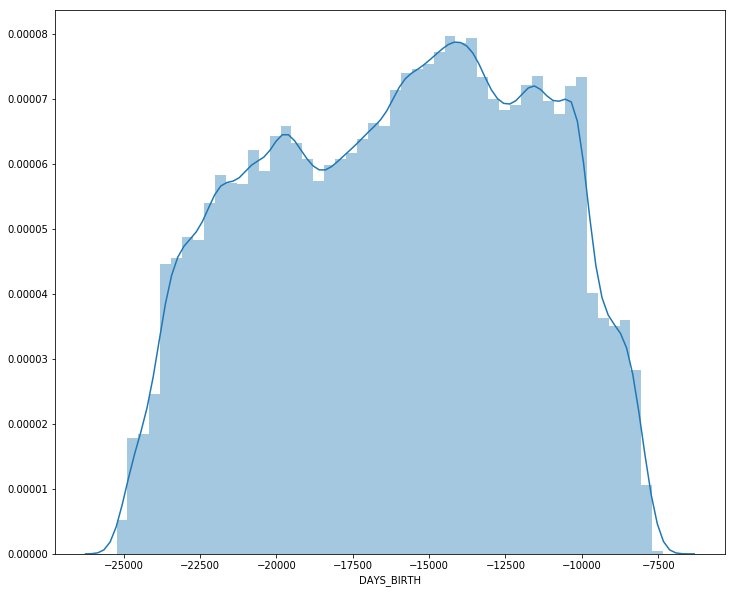

In [38]:
plt.figure(figsize=(12,10))
sns.distplot(app['DAYS_BIRTH'])
plt.show()

In [39]:
app['DAYS_BIRTH'].max() - app['DAYS_BIRTH'].min()

17891

In [40]:
17891/365

49.016438356164386

In [41]:
app['DAYS_BIRTH_BINS'] = pd.cut(app['DAYS_BIRTH'], 25, labels=range(25))

In [42]:
app['DAYS_EMPLOYED_ISNULL'] = app['DAYS_EMPLOYED'].isnull().apply(lambda x:int(x))

In [43]:
employed_grouped_median = app.groupby('DAYS_BIRTH_BINS')['DAYS_EMPLOYED'].median()

In [44]:
employed_grouped_median[0]

365243.0

In [45]:
app.loc[0, 'DAYS_BIRTH_BINS']

0    22
0     8
Name: DAYS_BIRTH_BINS, dtype: category
Categories (25, int64): [0 < 1 < 2 < 3 ... 21 < 22 < 23 < 24]

In [46]:
app[app.index==1]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CREDIT_GOODS_PRICE_DIFF,ENTIRE_INCOME,CREDIT_ENTIRE_INCOME_RATIO,ANNUITY_ENTIRE_INCOME_RATIO,INCOME_PER_CHILD,INCOME_PER_FAM_MEMBER,ENTIRE_INCOME_PER_FAM_MEMBER,ENTIRE_INCOME_PER_CHILD,AMT_ANNUITY_ISNULL,DAYS_BIRTH_BINS
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,164002.5,320760000.0,0.004033,0.000111,2700000.0,135000.0,160380000.0,3.207600e+09,0,11
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,42768.0,442431000.0,0.000504,0.000039,990000.0,49500.0,221215500.0,4.424310e+09,0,10


In [47]:
app = app.reset_index(drop=True)

In [48]:
app['DAYS_EMPLOYED'].isnull().sum()

0

In [49]:
app['DAYS_EMPLOYED_ISNULL'].sum()

0

In [50]:
employed_null_index = app[app['DAYS_EMPLOYED_ISNULL']==1].index

In [51]:
len(list(employed_null_index))

0

In [52]:
for i in employed_null_index:
    app.loc[i, 'DAYS_EMPLOYED'] = employed_grouped_median[app.loc[i, 'DAYS_BIRTH_BINS']]

In [53]:
del employed_grouped_median

In [54]:
del employed_null_index

In [55]:
app['DAYS_LAST_PHONE_CHANGE'].isnull().sum()

1

There is just one null value, we could just fill it with the median.

In [56]:
app['DAYS_LAST_PHONE_CHANGE'].fillna(app['DAYS_LAST_PHONE_CHANGE'].median(), inplace=True)

Now let's create a knn model to predict the annuity of the person.

### KNN model to predict annuity

There are two hyperparameters that I mainly want to optimize 1) distance metric 2) number of nearest neighbors

In [57]:
#from sklearn.neighbors import KNeighborsRegressor

In [58]:
X = app[app['AMT_ANNUITY'].notnull()][['AMT_INCOME_TOTAL','AMT_CREDIT','DAYS_LAST_PHONE_CHANGE','DAYS_EMPLOYED','CREDIT_INCOME_RATIO']].values
y = app['AMT_ANNUITY'].dropna().values

In [59]:
#annuity_knn = KNeighborsRegressor(n_neighbors=5, metric='braycurtis', weights='distance')

In [60]:
from sklearn.model_selection import train_test_split
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.1)

In [61]:
#annuity_knn.fit(X_tr, y_tr)

In [62]:
#annuity_knn.score(X_tr, y_tr)

That's actually a great R2 score for a model, I could just go ahead and use it right away.

In [63]:
#annuity_knn.score(X_ts, y_ts)

OOOOps it has been over fitting the training data, may be using uniform weights and increasing the number of neighbors could help.

In [64]:
#annuity_knn_uni = KNeighborsRegressor(n_neighbors=5, metric='braycurtis', weights='uniform', n_jobs=-1)

In [65]:
#annuity_knn_uni.fit(X_tr, y_tr)

In [66]:
#annuity_knn_uni.score(X_tr, y_tr)

In [67]:
#annuity_knn_uni.score(X_ts, y_ts)

In [68]:
#annuity_knn_uni = KNeighborsRegressor(n_neighbors=7, metric='braycurtis', weights='uniform', n_jobs=-1)

In [69]:
#annuity_knn_uni.fit(X_tr, y_tr)

In [70]:
#annuity_knn_uni.score(X_tr, y_tr)

In [71]:
#annuity_knn_uni.score(X_ts, y_ts)

In [72]:
#annuity_knn_uni = KNeighborsRegressor(n_neighbors=12, metric='braycurtis', weights='uniform', n_jobs=-1)

In [73]:
#annuity_knn_uni.fit(X_tr, y_tr)

In [74]:
#annuity_knn_uni.score(X_tr, y_tr)

In [75]:
#annuity_knn_uni.score(X_ts, y_ts)

In [76]:
#annuity_knn_uni = KNeighborsRegressor(n_neighbors=15, metric='braycurtis', weights='uniform', n_jobs=-1)

In [77]:
#annuity_knn_uni.fit(X_tr, y_tr)

In [78]:
#annuity_knn_uni.score(X_tr, y_tr)

In [79]:
#annuity_knn_uni.score(X_ts, y_ts)

Let's try our chances with the distance weights model.

In [80]:
#annuity_knn = KNeighborsRegressor(n_neighbors=13, metric='braycurtis', weights='distance', n_jobs=-1)

In [81]:
#annuity_knn.fit(X_tr, y_tr)

In [82]:
#annuity_knn.score(X_tr, y_tr)

In [83]:
#annuity_knn.score(X_ts, y_ts)

In [84]:
#annuity_knn = KNeighborsRegressor(n_neighbors=19, metric='braycurtis', weights='distance', n_jobs=-1)

In [85]:
#annuity_knn.fit(X_tr, y_tr)

In [86]:
#annuity_knn.score(X_tr, y_tr)

In [87]:
#annuity_knn.score(X_ts, y_ts)

In [88]:
#nnuity_knn = KNeighborsRegressor(n_neighbors=30,metric='braycurtis', weights='distance', n_jobs=-1)

In [89]:
#annuity_knn.fit(X_tr, y_tr)

In [90]:
#annuity_knn.score(X_tr, y_tr)

In [91]:
#annuity_knn.score(X_ts, y_ts)

In [92]:
from sklearn.ensemble import RandomForestRegressor

c:\python\python36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [93]:
#annuity_rf = RandomForestRegressor(n_estimators=200)

In [94]:
#annuity_rf.fit(X_tr, y_tr)

In [95]:
#annuity_rf.score(X_tr, y_tr)

In [96]:
#annuity_rf.score(X_ts, y_ts)

In [97]:
#annuity_rf = RandomForestRegressor(n_estimators=200, n_jobs=-1, verbose=1, max_depth=9, min_samples_leaf=3, min_samples_split=5)

In [98]:
#annuity_rf.fit(X_tr, y_tr)

In [99]:
#annuity_rf.score(X_tr, y_tr)

In [100]:
#annuity_rf.score(X_ts, y_ts)

In [101]:
#annuity_rf = RandomForestRegressor(n_estimators=200, n_jobs=-1, verbose=1, max_depth=15, min_samples_leaf=2, min_samples_split=3)

In [102]:
#annuity_rf.fit(X_tr, y_tr)

In [103]:
#annuity_rf.score(X_tr, y_tr)

In [104]:
#annuity_rf.score(X_ts, y_ts)

Okay, This is the best we've got so far. But it can be improved more

In [105]:
#annuity_rf = RandomForestRegressor(n_estimators=200, n_jobs=-1, verbose=1, max_depth=16, min_samples_leaf=4, min_samples_split=6)

In [106]:
#annuity_rf.fit(X_tr, y_tr)

In [107]:
#annuity_rf.score(X_tr, y_tr)

In [108]:
#annuity_rf.score(X_ts, y_ts)

In [109]:
annuity_rf = RandomForestRegressor(n_estimators=200, n_jobs=-1, verbose=1, max_depth=16, min_samples_leaf=4, 
                                   min_samples_split=6, min_impurity_decrease=0.05)

In [110]:
annuity_rf.fit(X_tr, y_tr)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.0s


KeyboardInterrupt: 

In [111]:
app.shape

(356255, 134)

In [ ]:
annuity_rf.score(X_tr, y_tr)

In [ ]:
annuity_rf.score(X_ts, y_ts)

This seems good, Let's take this!

In [ ]:
annuity_nan_indices  = app.index[app['AMT_ANNUITY'].isnull()]

In [ ]:
annuity = annuity_rf.predict(X)

In [ ]:
annuity.shape

In [ ]:
for index in annuity_nan_indices:
    app.loc[index, 'AMT_ANNUITY'] = annuity[index]

In [ ]:
app['AMT_ANNUITY'].isnull().sum()

In [ ]:
del annuity_rf

In [ ]:
app.isnull().sum()[app.isnull().sum()>0]

In [ ]:
goodsprice_nan_indices = app.index[app['AMT_GOODS_PRICE'].isnull()]
for index in goodsprice_nan_indices:
    app.loc[index, 'AMT_GOODS_PRICE'] = app.loc[index, 'AMT_CREDIT']

In [ ]:
del goodsprice_nan_indices

In [ ]:
app['REGION_POPULATION_RELATIVE'].isnull().sum()

In [ ]:
app['DAYS_BIRTH'].isnull().sum()

In [ ]:
app['DAYS_EMPLOYED'].isnull().sum()

In [ ]:
app['DAYS_REGISTRATION'].isnull().sum()

In [ ]:
app['DAYS_ID_PUBLISH'].isnull().sum()

In [ ]:
app['OWN_CAR_AGE'].isnull().sum()

In [ ]:
app_tr['ORGANIZATION_TYPE'].value_counts()

In [ ]:
app_ts['ORGANIZATION_TYPE'].value_counts()

In [ ]:
100*53/app_ts.shape[0]

In [ ]:
100*97/app_ts.shape[0]

In [ ]:
0.5*app_ts.shape[0]/100

Let's take that values below 0.5% are rare types, rare types gives the model a hard time to generalize.

In [ ]:
app['ORGANIZATION_TYPE'].replace('University', 'School', inplace=True)
app['ORGANIZATION_TYPE'].replace(['Trade: type 2 ', 'Trade: type 1'], 'Trade: type 3', inplace=True)
app['ORGANIZATION_TYPE'].replace(['Industry: type 6', 'Industry: type 13', 'Industry: type 8', 'Industry: type 10', 'Industry: type 7', 'Industry: type 1', 'Industry: type 4', 'Industry: type 5', 'Industry: type 9','Industry: type 3', 'Industry: type 12', 'Industry: type 2'], 'Industry', inplace=True)
app['ORGANIZATION_TYPE'].replace(['Transport: type 3', 'Transport: type 1'], 'Transport: type 4', inplace=True)
app['ORGANIZATION_TYPE'].replace('Electricity', 'Government', inplace=True)
app['ORGANIZATION_TYPE'].replace('Hotel', 'Restaurant', inplace=True)
app['ORGANIZATION_TYPE'].replace(['Trade: type 6', 'Trade: type 4', 'Trade: type 5'], 'Trade: type 7', inplace=True)
app['ORGANIZATION_TYPE'].replace(['Telecom', 'Advertising', 'Legal Services', 'Mobile'], 'Rare 1', inplace=True)
app['ORGANIZATION_TYPE'].replace(['Culture', 'cleaning', 'Religion'], 'Rare 2', inplace=True)
app['ORGANIZATION_TYPE'].replace('Emergency', 'Police', inplace=True)
app['ORGANIZATION_TYPE'].replace('Insurance', 'Bank', inplace=True)
app['ORGANIZATION_TYPE'].replace('Realtor', 'Housing', inplace=True)


In [ ]:
app['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum()

In [ ]:
app['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()

In [ ]:
app['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum()

In [ ]:
app['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum()

In [ ]:
app['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum()

In [ ]:
app['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum()

In [ ]:
app[app['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull()]

In [ ]:
app['AMT_REQ_CREDIT_BUREAU_QRT'].replace(261, 35, inplace=True)
app_tr['AMT_REQ_CREDIT_BUREAU_QRT'].replace(261, 35, inplace=True)

In [ ]:
app['AMT_REQ_CREDIT_BUREAU_TOTAL'] = app['AMT_REQ_CREDIT_BUREAU_HOUR'] + app['AMT_REQ_CREDIT_BUREAU_DAY'] + app['AMT_REQ_CREDIT_BUREAU_WEEK'] + app['AMT_REQ_CREDIT_BUREAU_MON'] + app['AMT_REQ_CREDIT_BUREAU_QRT'] + app['AMT_REQ_CREDIT_BUREAU_YEAR']

In [ ]:
app_tr['AMT_REQ_CREDIT_BUREAU_TOTAL'] = app_tr['AMT_REQ_CREDIT_BUREAU_HOUR'] + app_tr['AMT_REQ_CREDIT_BUREAU_DAY'] + app_tr['AMT_REQ_CREDIT_BUREAU_WEEK'] + app_tr['AMT_REQ_CREDIT_BUREAU_MON'] + app_tr['AMT_REQ_CREDIT_BUREAU_QRT'] + app_tr['AMT_REQ_CREDIT_BUREAU_YEAR']

In [ ]:
plt.figure(figsize=(16,14))
sns.lmplot(x='AMT_REQ_CREDIT_BUREAU_YEAR', y='AMT_REQ_CREDIT_BUREAU_QRT', data=app_tr, hue='TARGET')
plt.show()

In [ ]:
app['AMT_REQ_CREDIT_BUREAU_EMA'] = np.exp(-1/24)*app['AMT_REQ_CREDIT_BUREAU_HOUR'] + np.exp(-1)*app['AMT_REQ_CREDIT_BUREAU_DAY'] + np.exp(-7)*app['AMT_REQ_CREDIT_BUREAU_WEEK'] + np.exp(-30)*app['AMT_REQ_CREDIT_BUREAU_MON'] + np.exp(-90)*app['AMT_REQ_CREDIT_BUREAU_QRT'] + np.exp(-365)*app['AMT_REQ_CREDIT_BUREAU_YEAR']
app_tr['AMT_REQ_CREDIT_BUREAU_EMA'] = np.exp(-1/24)*app_tr['AMT_REQ_CREDIT_BUREAU_HOUR'] + np.exp(-1)*app_tr['AMT_REQ_CREDIT_BUREAU_DAY'] + np.exp(-7)*app_tr['AMT_REQ_CREDIT_BUREAU_WEEK'] + np.exp(-30)*app_tr['AMT_REQ_CREDIT_BUREAU_MON'] + np.exp(-90)*app_tr['AMT_REQ_CREDIT_BUREAU_QRT'] + np.exp(-365)*app_tr['AMT_REQ_CREDIT_BUREAU_YEAR']

In [ ]:
plt.figure(figsize=(18,18))
sns.lmplot(x='AMT_REQ_CREDIT_BUREAU_YEAR', y='AMT_REQ_CREDIT_BUREAU_EMA', data=app_tr, hue='TARGET', size=10)
plt.show()

In [ ]:
app['CREDIT_INCOME_RATIO'].isnull().sum()

In [ ]:
app['ANNUITY_INCOME_RATIO'].isnull().sum()

We can impute it from the imputed annuity.

In [ ]:
app['ANNUITY_INCOME_RATIO'] = app['AMT_ANNUITY']/app['AMT_INCOME_TOTAL']

In [ ]:
app['CREDIT_GOODS_PRICE_DIFF'].isnull().sum()

In [ ]:
app['CREDIT_GOODS_PRICE_DIFF'] = app['AMT_CREDIT'] - app['AMT_GOODS_PRICE']

In [ ]:
app['CREDIT_GOODS_PRICE_DIFF'].isnull().sum()

In [ ]:
app['ENTIRE_INCOME'].isnull().sum()

In [ ]:
app['ENTIRE_INCOME'] = -app['AMT_INCOME_TOTAL']*app['DAYS_EMPLOYED']

In [ ]:
app['ENTIRE_INCOME'].isnull().sum()

In [ ]:
app['CREDIT_ENTIRE_INCOME_RATIO'] = app['AMT_CREDIT']/app['ENTIRE_INCOME']

In [ ]:
app['ANNUITY_ENTIRE_INCOME_RATIO'] = app['AMT_ANNUITY']/app['ENTIRE_INCOME']

In [ ]:
app['INCOME_PER_FAM_MEMBER'] = app['AMT_INCOME_TOTAL']/app['CNT_FAM_MEMBERS']

In [ ]:
app['ENTIRE_INCOME_PER_FAM_MEMBER'] = app['ENTIRE_INCOME']/app['CNT_FAM_MEMBERS']

In [ ]:
app['FLAG_OWN_PROPERTY'] = app['FLAG_OWN_REALTY'] + app['FLAG_OWN_CAR']

Now I will remove all the features which are not considered important by the model and me.

In [ ]:
app['OCCUPATION_TYPE'].isnull().sum()

In [ ]:
app['OCCUPATION_TYPE'].value_counts()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

occupation_nan_indices = app.index[app['OCCUPATION_TYPE'].isnull()]
X = app[app['OCCUPATION_TYPE'].notnull()][['AMT_INCOME_TOTAL', 'AMT_ANNUITY']].values
X = np.append(X, pd.get_dummies(app[app['OCCUPATION_TYPE'].notnull()][['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE']]).values, axis=1)
y = le.fit_transform(app[app['OCCUPATION_TYPE'].notnull()]['OCCUPATION_TYPE'].values)

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.15)

from sklearn.neighbors import KNeighborsClassifier
knn_uni = KNeighborsClassifier(n_jobs=-1)
knn_uni.fit(X_tr, y_tr)

knn_uni.score(X_tr, y_tr)

knn_uni.score(X_ts, y_ts)

from sklearn.ensemble import RandomForestClassifier
occ_rf = RandomForestClassifier(n_estimators=180, n_jobs=-1)

occ_rf.fit(X_tr, y_tr)

occ_rf.score(X_tr, y_tr)

occ_rf.score(X_ts, y_ts)

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

occ_logreg = OneVsRestClassifier(LogisticRegression(max_iter=1000, n_jobs=-1), n_jobs=-1)
occ_logreg.fit(X_tr, y_tr)

occ_logreg.score(X_tr, y_tr)

occ_logreg.score(X_ts, y_ts)

from xgboost.sklearn import XGBClassifier

xgbc = XGBClassifier(max_depth=45, n_jobs=-1)
xgbc.fit(X_tr, y_tr)

xgbc.score(X_tr, y_tr)

xgbc.score(X_ts, y_ts)

In [ ]:
remove_cols = ['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT']

occ_rf = RandomForestClassifier(n_estimators=250, n_jobs=-1, max_depth=33, verbose=1)

occ_rf.fit(X_tr, y_tr)

occ_rf.score(X_tr,y_tr)

occ_rf.score(X_ts, y_ts)

occ_rf = RandomForestClassifier(n_estimators=250, n_jobs=-1, max_depth=None, verbose=1, min_samples_leaf=2, min_impurity_decrease=0.0008)

occ_rf.fit(X_tr, y_tr)

occ_rf.score(X_tr, y_tr)

occ_rf.score(X_ts, y_ts)

None of the models are doing a good job in giving us a good score!

In [ ]:
app['ORGANIZATION_TYPE'].isnull().sum()

In [ ]:
occ_grouped_mode = app.groupby('NAME_EDUCATION_TYPE')['OCCUPATION_TYPE'].apply(lambda x: x.mode())

In [ ]:
occ_grouped_mode

In [ ]:
occ_nan_indices = app.index[app['OCCUPATION_TYPE'].isnull()]

In [ ]:
for index in occ_nan_indices:
    app.loc[index, 'OCCUPATION_TYPE'] = occ_grouped_mode[app.loc[index, 'NAME_EDUCATION_TYPE']][0]

In [ ]:
app.drop(remove_cols, inplace=True, axis=1)

In [ ]:
del occ_grouped_mode, occ_nan_indices, remove_cols

In [ ]:
app.shape

In [ ]:
app.isnull().sum()

In [ ]:
app[app['LIVINGAREA_AVG'].isnull()][['YEARS_BEGINEXPLUATATION_AVG','LIVINGAREA_AVG','YEARS_BEGINEXPLUATATION_MODE', 'LIVINGAREA_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'LIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']]

In [ ]:
plt.figure(figsize=(12,10))
sns.distplot(app['LIVINGAREA_AVG'].dropna())
plt.show()

In [ ]:
plt.figure(figsize=(12,10))
sns.distplot(app['CREDIT_INCOME_RATIO'].dropna())
plt.show()

In [ ]:
plt.figure(figsize=(12,10))
sns.distplot(app['ANNUITY_INCOME_RATIO'].dropna())
plt.show()

In [ ]:
app[app['CREDIT_ENTIRE_INCOME_RATIO']!=-np.inf]['CREDIT_ENTIRE_INCOME_RATIO'].describe()

In [ ]:
app['ENTIRE_INCOME'].describe()

In [ ]:
app[app['CREDIT_ENTIRE_INCOME_RATIO']== -np.inf]['CREDIT_ENTIRE_INCOME_RATIO']

In [ ]:
app['CREDIT_ENTIRE_INCOME_RATIO'].replace(-np.inf, -0.01, inplace=True)

In [ ]:
plt.figure(figsize=(12,10))
sns.distplot(app['CREDIT_ENTIRE_INCOME_RATIO'].dropna())
plt.show()

In [ ]:
app[app['ANNUITY_ENTIRE_INCOME_RATIO'] != -np.inf]['ANNUITY_ENTIRE_INCOME_RATIO'].describe()

In [ ]:
app[app['ANNUITY_ENTIRE_INCOME_RATIO'] == -np.inf]['ANNUITY_ENTIRE_INCOME_RATIO']

In [ ]:
app['ANNUITY_ENTIRE_INCOME_RATIO'].replace(-np.inf, -0.001, inplace=True)

In [ ]:
plt.figure(figsize=(12,10))
sns.distplot(app['ANNUITY_ENTIRE_INCOME_RATIO'].dropna())
plt.show()

In [ ]:
app['CREDIT_INCOME_RATIO_BINS'] = pd.cut(app['CREDIT_INCOME_RATIO'], 47, labels=range(47))

In [ ]:
app['ANNUITY_INCOME_RATIO_BINS'] = pd.cut(app['ANNUITY_INCOME_RATIO'], 30, labels=range(30))

In [ ]:
app['CREDIT_ENTIRE_INCOME_RATIO_BINS'] = pd.cut(app['CREDIT_ENTIRE_INCOME_RATIO'], 300, labels=range(300))

In [ ]:
app['ANNUITY_ENTIRE_INCOME_RATIO_BINS'] = pd.cut(app['ANNUITY_ENTIRE_INCOME_RATIO'], 350, labels=range(350))

In [ ]:
home_cols = ['YEARS_BEGINEXPLUATATION_AVG','LIVINGAREA_AVG','YEARS_BEGINEXPLUATATION_MODE', 'LIVINGAREA_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'LIVINGAREA_MEDI', 'TOTALAREA_MODE']

In [ ]:
for col in home_cols:
    home_grouped = app.groupby(['CREDIT_INCOME_RATIO_BINS', 'ANNUITY_INCOME_RATIO_BINS', 'CREDIT_ENTIRE_INCOME_RATIO_BINS', 'ANNUITY_ENTIRE_INCOME_RATIO_BINS'])[col].mean()
    nan_indices = app.index[app[col].isnull()]
    for index in nan_indices:
        app.loc[index, col] = home_grouped[app.loc[index, 'CREDIT_INCOME_RATIO_BINS']][app.loc[index, 'ANNUITY_INCOME_RATIO_BINS']][app.loc[index, 'CREDIT_ENTIRE_INCOME_RATIO_BINS']][app.loc[index, 'ANNUITY_ENTIRE_INCOME_RATIO_BINS']]
        

In [ ]:
app[home_cols].head(10)

In [ ]:
app['EMERGENCYSTATE_MODE'].describe()

In [ ]:
app.isnull().sum()[app.isnull().sum()>0]

In [ ]:
home_cat_cols = ['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

In [ ]:
app.drop(home_cat_cols, axis=1, inplace=True)

In [ ]:
app[['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']].describe()

In [ ]:
app.isnull().sum()[app.isnull().sum()>0]

In [ ]:
social_cols = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']

In [ ]:
for col in social_cols:
    home_grouped = app.groupby(['CREDIT_INCOME_RATIO_BINS', 'ANNUITY_INCOME_RATIO_BINS', 'CREDIT_ENTIRE_INCOME_RATIO_BINS', 'ANNUITY_ENTIRE_INCOME_RATIO_BINS'])[col].mean()
    nan_indices = app.index[app[col].isnull()]
    for index in nan_indices:
        app.loc[index, col] = home_grouped[app.loc[index, 'CREDIT_INCOME_RATIO_BINS']][app.loc[index, 'ANNUITY_INCOME_RATIO_BINS']][app.loc[index, 'CREDIT_ENTIRE_INCOME_RATIO_BINS']][app.loc[index, 'ANNUITY_ENTIRE_INCOME_RATIO_BINS']]

In [ ]:
app['YEARS_BEGINEXPLUATATION_AVG'].fillna(app['YEARS_BEGINEXPLUATATION_AVG'].mean(), inplace=True)

In [ ]:
app['LIVINGAREA_AVG'].fillna(app['LIVINGAREA_AVG'].mean(), inplace=True)

In [ ]:
app['YEARS_BEGINEXPLUATATION_MODE'].fillna(app['YEARS_BEGINEXPLUATATION_MEDI'].mean(), inplace=True)

In [ ]:
app['LIVINGAREA_MODE'].fillna(app['LIVINGAREA_MODE'].mean(), inplace=True)

In [ ]:
app['YEARS_BEGINEXPLUATATION_MEDI'].fillna(app['YEARS_BEGINEXPLUATATION_MEDI'].mean(), inplace=True)

In [ ]:
app['LIVINGAREA_MEDI'].fillna(app['LIVINGAREA_MEDI'].mean(), inplace=True)

In [ ]:
app['TOTALAREA_MODE'].fillna(app['TOTALAREA_MODE'].mean(), inplace=True)

In [ ]:
app.isnull().sum()[app.isnull().sum()>0]

In [ ]:
app.columns

In [ ]:
'CREDIT_INCOME_RATIO', 'ANNUITY_INCOME_RATIO', 'ENTIRE_INCOME', 'CREDIT_ENTIRE_INCOME_RATIO', 'ANNUITY_ENTIRE_INCOME_RATIO', 'INCOME_PER_CHILD', 'INCOME_PER_FAM_MEMBER', 'ENTIRE_INCOME_PER_CHILD', 'ENTIRE_INCOME_PER_FAM_MEMBER'

In [ ]:
app['CREDIT_INCOME_RATIO_BINS'] = pd.cut(app['CREDIT_INCOME_RATIO'], 3, labels=range(3))

In [ ]:
app['ANNUITY_INCOME_RATIO_BINS'] = pd.cut(app['ANNUITY_INCOME_RATIO'], 10, labels=range(10))

In [ ]:
#app['ENTIRE_INCOME_BINS'] = pd.cut(app['ENTIRE_INCOME'], 3, labels=range(3))

In [ ]:
app['CREDIT_ENTIRE_INCOME_RATIO_BINS'] = pd.cut(app['CREDIT_ENTIRE_INCOME_RATIO'], 3, labels=range(3))

In [ ]:
app['ANNUITY_ENTIRE_INCOME_RATIO_BINS'] = pd.cut(app['ANNUITY_ENTIRE_INCOME_RATIO'], 3, labels=range(3))

In [ ]:
#app['INCOME_PER_CHILD_BINS'] = pd.cut(app['INCOME_PER_CHILD'], 3, labels=range(3))

In [ ]:
#app['INCOME_PER_FAM_MEMBER_BINS'] = pd.cut(app['INCOME_PER_FAM_MEMBER'], 3, labels=range(3))

In [ ]:
#app['ENTIRE_INCOME_PER_CHILD_BINS'] = pd.cut(app['ENTIRE_INCOME_PER_CHILD'], 3, labels=range(3))

In [ ]:
#app['ENTIRE_INCOME_PER_FAM_MEMBER_BINS'] = pd.cut(app['ENTIRE_INCOME_PER_FAM_MEMBER'], 3, labels=range(3))

In [ ]:
ext_source_impute = app[['ANNUITY_INCOME_RATIO_BINS',
 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].groupby(['ANNUITY_INCOME_RATIO_BINS']).mean()

In [ ]:
ext_source_impute

In [ ]:
ext_source_1_nan_indices = app.index[app['EXT_SOURCE_1'].isnull()]

In [ ]:
for i in ext_source_1_nan_indices:
    app.loc[i, 'EXT_SOURCE_1'] = ext_source_impute['EXT_SOURCE_1'][app.loc[i, 'ANNUITY_INCOME_RATIO_BINS']]

In [ ]:
ext_source_2_nan_indices = app.index[app['EXT_SOURCE_2'].isnull()]

In [ ]:
for i in ext_source_2_nan_indices:
    app.loc[i, 'EXT_SOURCE_2'] = ext_source_impute['EXT_SOURCE_2'][app.loc[i, 'ANNUITY_INCOME_RATIO_BINS']]

In [ ]:
ext_source_3_nan_indices = app.index[app['EXT_SOURCE_3'].isnull()]

In [ ]:
for i in ext_source_3_nan_indices:
    app.loc[i, 'EXT_SOURCE_3'] = ext_source_impute['EXT_SOURCE_3'][app.loc[i, 'ANNUITY_INCOME_RATIO_BINS']]

In [ ]:
del ext_source_1_nan_indices, ext_source_2_nan_indices, ext_source_3_nan_indices, ext_source_impute

In [ ]:
app.drop(['CREDIT_INCOME_RATIO_BINS', 'ANNUITY_INCOME_RATIO_BINS', 'ENTIRE_INCOME_BINS', 'CREDIT_ENTIRE_INCOME_RATIO_BINS', 'ANNUITY_ENTIRE_INCOME_RATIO_BINS', 'INCOME_PER_CHILD_BINS', 'INCOME_PER_FAM_MEMBER_BINS', 'ENTIRE_INCOME_PER_CHILD_BINS', 'ENTIRE_INCOME_PER_FAM_MEMBER_BINS'], axis=1, inplace = True)

In [ ]:
app.isnull().sum()

In [ ]:
app['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(app['AMT_REQ_CREDIT_BUREAU_YEAR'].mean(), inplace=True)

In [ ]:
app['AMT_REQ_CREDIT_BUREAU_TOTAL'].fillna(app['AMT_REQ_CREDIT_BUREAU_TOTAL'].mean(), inplace=True)

In [ ]:
app['AMT_REQ_CREDIT_BUREAU_EMA'].fillna(app['AMT_REQ_CREDIT_BUREAU_EMA'].mean(), inplace=True)

In [ ]:
app.to_csv('application_ready.csv')